 
# Analyse des sentiments
### Naive Bayes
Un classificateur simple mais efficace pour le texte. Il est rapide et sert de base solide.

### XGBoost
Une technique avancée connue pour ses performances élevées dans le traitement des données textuelles éparses, ce qui la rend adaptée à une classification détaillée des sentiments.

### Hugging Face Transformers
Utilise des modèles d'apprentissage profond de pointe pour comprendre le contexte et les nuances du langage, offrant ainsi profondeur et précision dans l'analyse des sentiments.

Ces méthodes vont du simple au complexe, chacune ayant ses points forts, ce qui nous permet d'évaluer et de sélectionner l'approche la plus efficace pour la prédiction des sentiments.


## Introduction
L'analyse des sentiments est devenue un domaine important du traitement du langage naturel (NLP), qui se concentre sur l'extraction et l'identification du contenu émotionnel ou subjectif de divers textes. Cette technique analytique est de plus en plus utilisée par les entreprises du monde entier pour mieux connaître les opinions et les préférences des clients, en ciblant divers segments démographiques. Ses applications s'étendent à de nombreuses sources d'information, telles que les critiques de produits en ligne, les plateformes de médias sociaux et les commentaires issus d'enquêtes, entre autres.




In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from transformers import pipeline
import warnings; warnings.filterwarnings('ignore')


c:\Users\kamts\Documents\My Project\Sentiment on Consumer Reviews\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Charger le Dataset et visuaaliser l'entête 
df = pd.read_csv('./Data/1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
# Afficher les information liées au Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 


# Analyse exploratoire des données (AED)

## Préparation des données pour l'analyse de sentiments

Cette section réduit notre ensemble de données en se concentrant sur deux éléments cruciaux : le texte des évaluations des clients (`reviews.text`) et les évaluations associées (`reviews.rating`). Cette approche simplifiée nous permet d'analyser directement les sentiments exprimés dans le contenu textuel ainsi que les indicateurs quantitatifs de sentiment fournis par les évaluations.

In [7]:
data = df[["reviews.text","reviews.rating"]]
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34659 non-null  object 
 1   reviews.rating  34627 non-null  float64
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


## Nettoyage des données manquantes

Pour garantir l'intégrité de notre ensemble de données et sa préparation à l'analyse des sentiments, nous effectuons un processus de nettoyage des données en deux étapes, axé sur le traitement des valeurs manquantes 

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [10]:
# Découvrons quelques reviews
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
Good size screen and clarity for the money. Seems fairly robust. The biggest problem is putting apps on it, at least free games. They do not have a great selection and when I put them on some of them require you turn on tracking so they can collect information or they won't let you play it 

RATE:
3.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Works great . Able to listen to radio ,watch tv shows , 

RATE:
5.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Overall is a good product but sometimes you have to repeat commands several times 

RATE:
4.0

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
The Kindle Paper White is the perfect gift for anyone. My mom had the original Kindle and it recently broke. When I was looking for a new one for her I looked at other Kindles and e-book readers. I 

In [11]:
# Statistiques descriptives
data.describe()

,reviews.rating
count,34626.000000
mean,4.584561
std,0.735660
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
# Répartition des notes 
data['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
5.0    23774
4.0     8541
3.0     1499
2.0      402
1.0      410
Name: count, dtype: int64

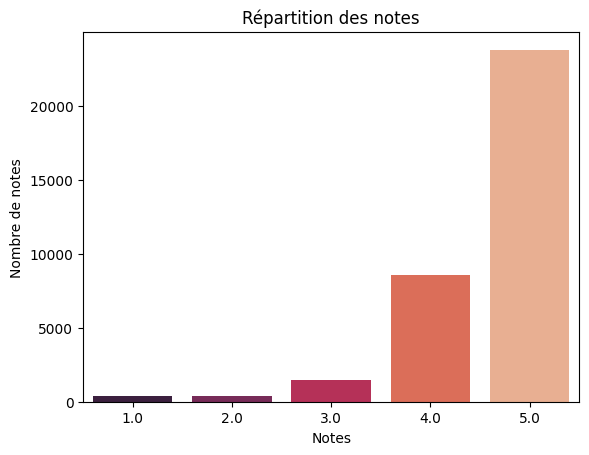

In [13]:
# Graph de la répartition des notes 
sns.barplot(x=data['reviews.rating'].value_counts().index, y=data['reviews.rating'].value_counts().values, palette='rocket')
plt.title('Répartition des notes')
plt.xlabel('Notes')
plt.ylabel('Nombre de notes')
plt.show()


 Il y a un énorme déséquilibre dans les données pour les classes à taux élevé. Nous essaierons d'ajouter plus de données sur les classes à faible taux.
 
 

In [14]:
# charger les autres données
data2 = pd.read_csv("./Data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.text', 'reviews.rating']]

data3 = pd.read_csv("./Data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.text', 'reviews.rating']]

 
# n'utiliser que des données dont l'indice est inférieur ou égal à 3
data2 = data2[data2["reviews.rating"] <= 3].reset_index(drop=True) 
data3 = data3[data3["reviews.rating"] <= 3].reset_index(drop=True) 

In [15]:
# Répartition de l'évaluation
data2['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
3    1206
2     616
1     965
Name: count, dtype: int64

In [16]:
# répartition des notes
data3['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
3    197
2     54
1     63
Name: count, dtype: int64

In [17]:
# concaténation
data = pd.concat([data, data2, data3])
data.head()

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0


In [18]:
# répartition des notes
data['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
5.0    23774
4.0     8541
3.0     2902
2.0     1072
1.0     1438
Name: count, dtype: int64

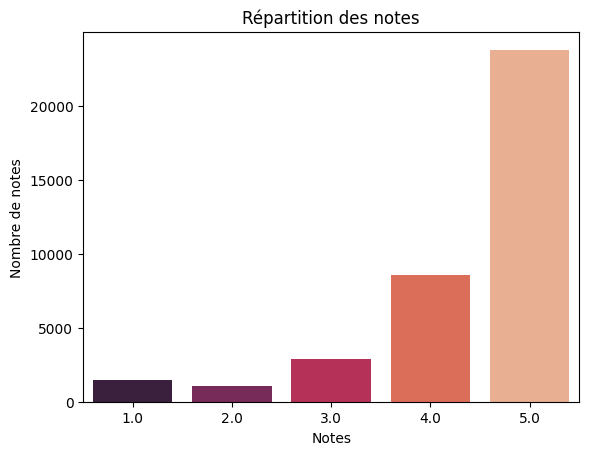

In [19]:
# Nouveau graph de la répartition des notes 
sns.barplot(x=data['reviews.rating'].value_counts().index, y=data['reviews.rating'].value_counts().values, palette='rocket')
plt.title('Répartition des notes')
plt.xlabel('Notes')
plt.ylabel('Nombre de notes')
plt.show()

## Simplification de l'analyse.
Cette section transforme les évaluations numériques en étiquettes de sentiment binaires pour une analyse de sentiment simple :

- **Classification des sentiments** : Les notes 1 à 3 sont mises en correspondance avec `0` (NEGATIF), et 4 à 5 avec `1` (POSITIF) en utilisant un dictionnaire `sentiment_score`. 
- **Étiquetage des sentiments** : Les codes binaires sont ensuite associés à des étiquettes textuelles (`NEGATIVE` ou `POSITIVE`) pour plus de clarté.
- Application : Les mappages sont appliqués pour créer de nouvelles colonnes dans l'ensemble de données : `sentiment_score` pour les codes binaires et `sentiment` pour les étiquettes textuelles.
- Vérification : Nous affichons les premières lignes avec `data.head()` pour vérifier les informations de sentiment nouvellement ajoutées.

Cette approche permet de rationaliser l'ensemble des données pour une analyse binaire efficace des sentiments.

In [20]:
sentiment_score = {1: 0, 2: 0,3: 0, 4: 1,5: 1}
sentiment = {0: 'NEGATIVE', 1: 'POSITIVE'}
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,reviews.text,reviews.rating,sentiment_score,sentiment
0,This product so far has not disappointed. My c...,5.0,1,POSITIVE
1,great for beginner or experienced person. Boug...,5.0,1,POSITIVE
2,Inexpensive tablet for him to use and learn on...,5.0,1,POSITIVE
3,I've had my Fire HD 8 two weeks now and I love...,4.0,1,POSITIVE
4,I bought this for my grand daughter when she c...,5.0,1,POSITIVE


In [21]:
# répartition des sentiments
data['sentiment'].value_counts()


sentiment
POSITIVE    32315
NEGATIVE     5412
Name: count, dtype: int64

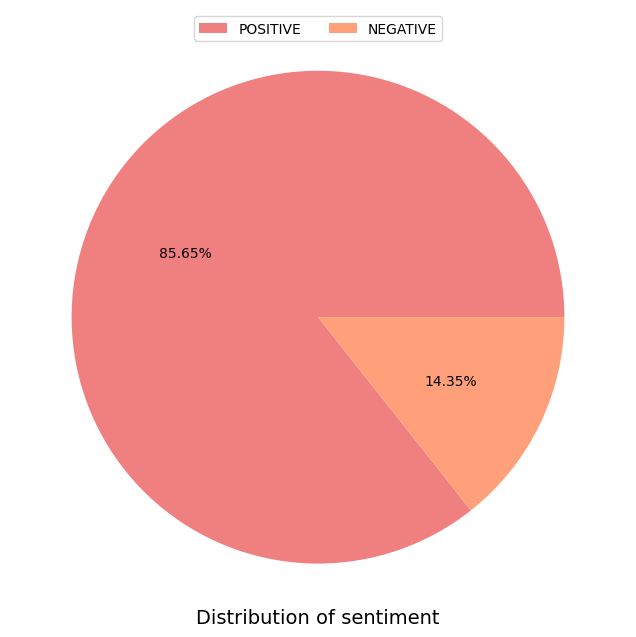

In [22]:
# graph de répartition des sentiments
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#F08080', '#FFA07A']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

 ### Les mots plus utilisés


### Analyse sur les mots

In [23]:
# obtenir tous les mots utilisés 
all_words = pd.Series(' '.join(data['reviews.text']).split())

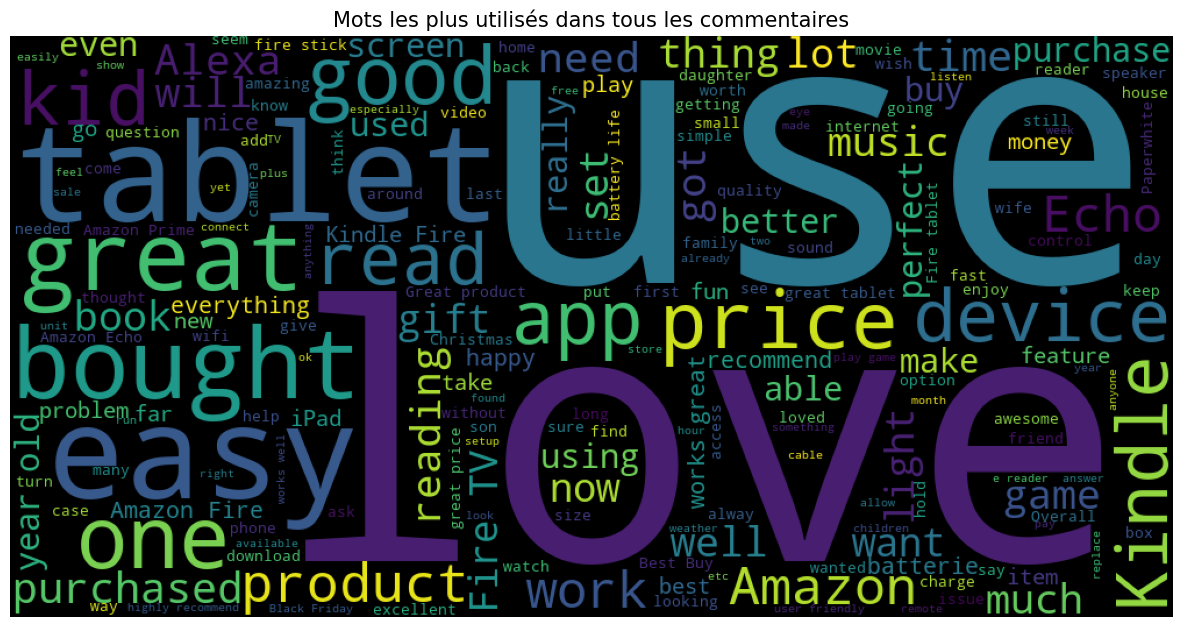

In [24]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Mots les plus utilisés dans tous les commentaires", size=15)
plt.axis("off")
plt.show()

#### Avis positifs

In [25]:
# obtenir des mots utilisés des commentaires positives 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

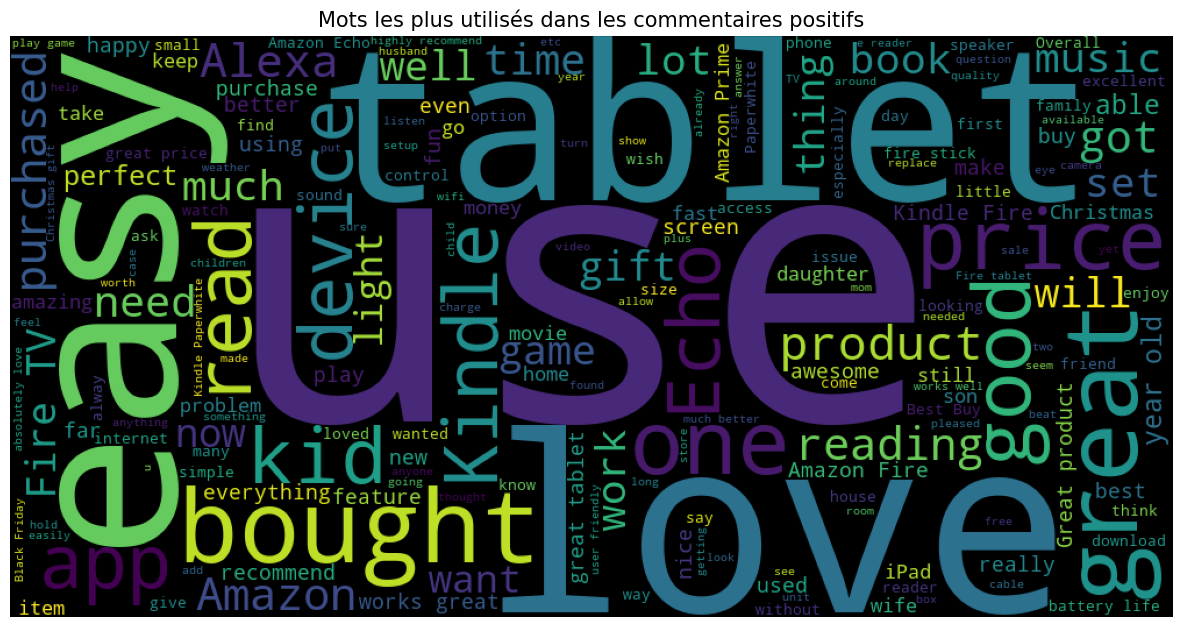

In [26]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Mots les plus utilisés dans les commentaires positifs", size=15)

plt.axis("off")
plt.show()

  #### Avis négatifs
 
 

In [27]:
# obtenir des mots utilisés des commentaires négatifs  
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

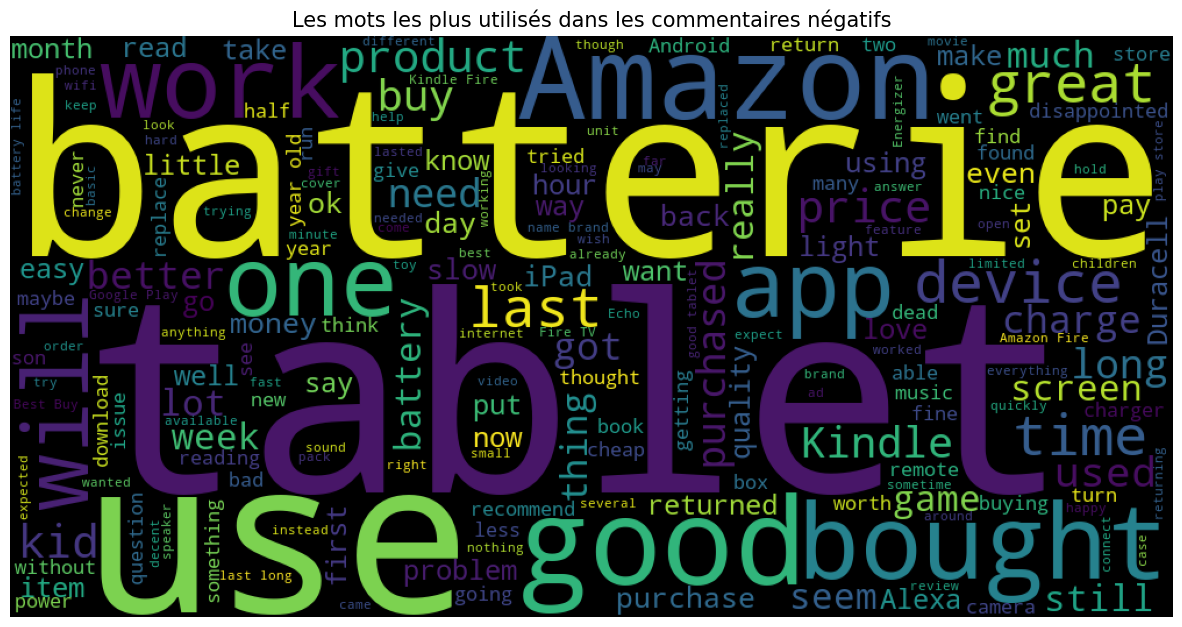

In [28]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Les mots les plus utilisés dans les commentaires négatifs", size=15)

plt.axis("off")
plt.show()

## Traitement de texte
 
 

 
### Nettoyage de texte
La fonction `clean_text` normalise les données textuelles en effectuant plusieurs opérations de nettoyage, cruciales pour les tâches NLP. Elle convertit le texte en minuscules, supprime les balises HTML, remplace les chiffres et la ponctuation par des espaces, et élimine les espaces supplémentaires. Une démonstration avec une chaîne de test illustre le processus de nettoyage, préparant le texte pour une analyse ultérieure en assurant l'uniformité et en supprimant les caractères inutiles.
 
 

In [29]:
def clean_text(text:str):
    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [30]:
# Testons maintenant la fonction de nettoyage
text = "   lorem <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem"
print(text, '\n')
clean_text(text)

   lorem <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem 



'lorem ipsum lorem'

## Suppression des mots vides dans le texte

Les mots vides sont des mots fréquents dans une langue qui apparaissent souvent mais offrent peu ou pas de valeur pour comprendre le sens d'un texte, en particulier dans le contexte du traitement automatique du langage naturel (TALN). Supprimer ces mots peut aider à se concentrer sur les mots plus significatifs du texte. La fonction `remove_stopwords` est conçue à cet effet.

### Comment ça fonctionne :
- La fonction accepte une chaîne de caractères `text` en entrée et initie une liste vide `filtered_sentence` pour contenir le texte traité.
- Elle définit une liste `stop_words` contenant des mots vides courants tels que "a", "an", "the", etc., identifiés comme ne contribuant pas de manière significative au sens global des phrases.
- Le texte d'entrée est tokenisé en mots en utilisant la fonction `word_tokenize` de la bibliothèque `nltk`. Ce processus divise le texte en mots individuels.
- Elle itère ensuite sur chaque mot de la liste tokenisée, vérifiant si le mot n'est pas dans la liste `stop_words`. Si un mot n'est pas un mot vide, il est ajouté à la liste `filtered_sentence`.
- Enfin, les mots de la liste `filtered_sentence` sont rassemblés en une seule chaîne avec des espaces, et ce texte nettoyé est renvoyé.

In [31]:
def remove_stopwords(text:str):
    text = str(text)
    filtered_sentence = []

    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [32]:
# Testons maintenant la fonction de suppression des mots vides
text = "  this is a sample text to test stopwords removal :) <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem"
print(text, '\n')
text = clean_text(text)
remove_stopwords(text)

  this is a sample text to test stopwords removal :) <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem 



'sample text test stopwords removal ipsum lorem'


## Réduction des mots à leur racine (Stemming)

Le "stemming" est un système basé sur des règles qui convertit les mots en leur forme racine. Il supprime les suffixes des mots, ce qui aide à améliorer les similarités (le cas échéant) entre les phrases. Cette technique est particulièrement utile dans le traitement automatique du langage naturel pour réduire la complexité des mots et uniformiser les variantes d'un même mot.

### Fonctionnement :
- La fonction `stemm_text` prend en entrée un texte (`text`) et retourne le texte avec les mots réduits à leur racine.
- Un objet "stemmer", ici `SnowballStemmer` pour l'anglais, est initialisé pour effectuer l'opération de réduction. Le Snowball Stemmer est connu pour sa capacité à gérer efficacement la langue anglaise, bien que des stemmers soient disponibles pour plusieurs autres langues.
- Le texte d'entrée est d'abord converti en une liste de mots (tokens) à l'aide de la fonction `word_tokenize`.
- Chaque mot est ensuite passé à travers le stemmer, qui en supprime les suffixes pour le réduire à sa forme racine.
- Les mots réduits sont rassemblés en une chaîne de caractères, séparés par des espaces, et le texte résultant est retourné.

In [33]:
def stemm_text(text:str):
    text = str(text)
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    
    words = word_tokenize(text)
    for w in words:
        
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [34]:
# Testons maintenant la fonction de racinisation
text = "  this is a sample text to test stopwords removal :) <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem"
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
stemm_text(text)

  this is a sample text to test stopwords removal :) <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem 



'sampl text test stopword remov ipsum lorem'

> Vous pouvez voir ci-dessus que l'opération de stemming n'est pas parfaite. Nous avons des erreurs telles que "sampl", "remov". Il s'agit d'une méthode basée sur des règles qui supprime parfois par erreur les suffixes des mots. Néanmoins, elle fonctionne rapidement.

## Lemmatisation

Si les résultats de la réduction à la racine (stemming) ne sont pas satisfaisants, nous pouvons utiliser la lemmatisation. Cette technique est généralement plus complexe mais offre de meilleurs résultats. Comme mentionné précédemment, la lemmatisation nécessite de connaître les catégories grammaticales des mots, telles que nom, verbe, adjectif, etc., et nous utiliserons une autre fonction de NLTK pour fournir ces informations au lemmatiseur.

### Fonction Auxiliaire pour les Tags de Position
La fonction `get_wordnet_pos` sert à convertir les tags de position de NLTK en tags compatibles avec WordNet, nécessaires pour la lemmatisation. Elle traduit les tags commençant par 'J' en adjectif, ceux commençant par 'V' en verbe, 'N' en nom, et 'R' en adverbe. Pour les autres cas, elle attribue par défaut la catégorie nom.

### Lemmatisation :
- La fonction `lemmatize` prend en entrée un texte (`text`) et le retourne lemmatisé, c’est-à-dire réduit à la forme de dictionnaire de chaque mot.
- Elle initialise d'abord un lemmatiseur `WordNetLemmatizer`.
- Le texte est tokenisé, et chaque token est associé à un tag de position grammaticale grâce à `nltk.pos_tag`.
- Pour chaque mot et son tag, la fonction de mappage `get_wordnet_pos` est utilisée pour obtenir le tag compatible avec WordNet, qui est ensuite passé au lemmatiseur avec le mot correspondant.
- Les mots lemmatisés sont rassemblés en une chaîne et renvoyés.

In [35]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [36]:
def lemmatize(text:str):
    text = str(text)
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)
    
    return lemmatized_text

In [37]:
# Testons maintenant la fonction de lemmatisation
text = " this message is a sample text to test stopwords removal :) <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem"
print(text, '\n')
text = clean_text(text)
text = remove_stopwords(text)
# text = stemm_text(text)
lemmatize(text)

 this message is a sample text to test stopwords removal :) <p>ipsum</p> 1234 5678 90! @#$%^&*()_+  lorem 



'message sample text test stopwords removal ipsum lorem'

 
> Ce résultat est meilleur que celui de l'extraction.
 
 

 
### Appliquer des fonctions de traitement de texte 
 
 

In [38]:
# clean text
data['text'] = data['reviews.text'].apply(clean_text)
# remove stopwords
data['text'] = data['text'].apply(remove_stopwords)
# lemmatize
data['text'] = data['text'].apply(lemmatize)

In [39]:
# Consulter quelques avis traités
import random

i = random.choice(range(len(data)))

print(f"Original review: \n{data['reviews.text'].iloc[i]}\n")
print(f"Processed review: \n{data['text'].iloc[i]}")      

Original review: 
Very easy to set up and use works great on my non smart tv

Processed review: 
very easy set up use work great on my non smart tv


In [40]:
# Exporter les données nettoyées au format csv
data.to_csv('./Data/cleaned_data.csv', index=False)

In [41]:
data = pd.read_csv('./Data/cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37727 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37727 non-null  object 
 1   reviews.rating   37727 non-null  float64
 2   sentiment_score  37727 non-null  int64  
 3   sentiment        37727 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [42]:
# Renvoyer les lignes où la colonne 'text' est vide
data[data['text'].isnull()]

,reviews.text,reviews.rating,sentiment_score,sentiment,text
9681,.................................................,5.0,1,POSITIVE,NaN


In [43]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37726 entries, 0 to 37726
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviews.text     37726 non-null  object 
 1   reviews.rating   37726 non-null  float64
 2   sentiment_score  37726 non-null  int64  
 3   sentiment        37726 non-null  object 
 4   text             37726 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ MB


## Ingénierie des caractéristiques et sélection

Cette section couvre le processus de préparation des données pour le modèle d'analyse des sentiments en utilisant le TF-IDF pour la vectorisation, la division du jeu de données, et l'équilibrage des classes par suréchantillonnage.

### Création de TF-IDF
La vectorisation TF-IDF (Term Frequency-Inverse Document Frequency) est appliquée sur la colonne `'text'` du DataFrame `data`, limitée aux 700 caractéristiques les plus importantes. Cette méthode transforme le texte en un ensemble de variables numériques représentant l'importance de chaque mot dans le corpus par rapport à leur fréquence dans les documents. Le résultat est converti en un DataFrame `tf_idf` pour faciliter l'analyse et la modélisation.

### Division du jeu de données
Le jeu de données est divisé en ensembles d'entraînement et de test avec `train_test_split`, en utilisant 80% des données pour l'entraînement et 20% pour le test. Cette étape est cruciale pour évaluer la performance du modèle sur des données non vues.

### Suréchantillonnage
Pour aborder le déséquilibre potentiel entre les classes positives et négatives dans les scores de sentiment, le suréchantillonnage est réalisé sur la classe minoritaire. Cela implique la duplication des entrées de la classe minoritaire pour équilibrer le nombre d'instances entre les classes, ce qui aide à prévenir le biais du modèle en faveur de la classe majoritaire. Le DataFrame résultant `df_train_over` est mélangé pour assurer une distribution aléatoire des données.

### Nettoyage final et préparation des ensembles d'entraînement
Les données sont nettoyées pour éliminer les valeurs nulles restantes, et les ensembles de caractéristiques (`X_train`) et cibles (`y_train`) sont redéfinis à partir du DataFrame suréchantillonné et nettoyé. Ces étapes garantissent que le modèle est entraîné sur un jeu de données équilibré et bien préparé, essentiel pour construire un modèle d'analyse des sentiments robuste et fiable.


### Création TF-IDF

In [44]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0.        , 0.31997416, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf.head()


,50,ability,able,about,absolutely,access,account,actually,ad,add,...,would,wouldn,wrong,year,yet,you,young,your,youtube,yr
0,0.0,0.319974,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.114228,0.0,0.0,0.129196,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.075228,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.117444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.068385,0.0,0.0,0.0,0.0


 
### Division de l'ensemble de données en deux ensembles : l'ensembled'entraînement et l'ensemble de test
 
 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print(f'Forme de l\'ensemble d\'entraînement\t: {X_train.shape}\nForme de l\'ensemble de test\t: {X_test.shape}')

Forme de l'ensemble d'entraînement	: (30180, 700)
Forme de l'ensemble de test	: (7546, 700)


In [47]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data.head()


,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
25313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.388388,0.0,0.0,0.0,1.0
21503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN
7779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0
35729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.224295,0.000000,0.0,0.0,0.0,NaN
15266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN


### Suréchantillonnage

In [48]:
train_data['sentiment_score'].value_counts()

sentiment_score
1.0    25902
0.0     4278
Name: count, dtype: int64

In [49]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,50,ability,able,about,absolutely,access,account,actually,ad,add,...,wouldn,wrong,year,yet,you,young,your,youtube,yr,sentiment_score
4692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.336141,1.0
14381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
35870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
36063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [50]:
df_train_over.dropna(inplace=True)

In [51]:
df_train_over['sentiment_score'].value_counts()

sentiment_score
1.0    22189
0.0    21364
Name: count, dtype: int64

In [52]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

## Modèles

Cette section définit une fonction `modeling` destinée à faciliter l'application d'algorithmes d'apprentissage automatique aux données de texte traitées. La fonction prend en paramètre un modèle d'apprentissage automatique et, optionnellement, des ensembles d'entraînement et de test pour les caractéristiques. Voici une explication détaillée de son fonctionnement :

### Objectif
La fonction `modeling` vise à encapsuler le processus de formation et d'évaluation d'un modèle sur les données préparées, en utilisant la représentation vectorisée TF-IDF des critiques comme entrées.

### Étapes Clés :
1. **Initialisation du Modèle** : Un modèle est instancié avec le paramètre `Model`. Cela permet à la fonction d'être flexible et applicable à divers algorithmes d'apprentissage automatique.

2. **Entraînement du Modèle** : Le modèle est entraîné (`fit`) sur l'ensemble d'entraînement `Xtrain` et les étiquettes correspondantes `y_train`. Cette étape ajuste le modèle aux données fournies.

3. **Prédiction** : Le modèle formé est ensuite utilisé pour prédire les étiquettes de l'ensemble de test `Xtest`. Les prédictions sont stockées dans la variable globale `y_pred`.

4. **Évaluation du Modèle** : 
   - Un rapport de classification est généré en utilisant `classification_report`, qui fournit diverses métriques d'évaluation telles que la précision, le rappel, le score F1, etc., pour chaque classe.
   - Le score AUC (Area Under the ROC Curve) est calculé et affiché avec `roc_auc_score`, offrant une mesure de la performance du modèle sur les classes déséquilibrées.
   
5. **Matrice de Confusion** : 
   - Une matrice de confusion est construite et visualisée à l'aide de `sns.heatmap` pour illustrer la répartition des prédictions par rapport aux vraies étiquettes. Cela permet de visualiser les performances du modèle, notamment sa capacité à classer correctement les exemples positifs et négatifs.
   - La matrice est affichée avec une coloration `Blues`, facilitant l'interprétation des valeurs de la matrice par des gradients de couleur.

### Conclusion
La fonction `modeling` offre une méthode concise et réutilisable pour appliquer divers modèles d'apprentissage automatique aux données de texte, permettant une évaluation rapide de la performance de chaque modèle sur la tâche de classification des sentiments.


In [53]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    
    model = Model
    model.fit(Xtrain, y_train)
    
    global y_pred
    
    y_pred = model.predict(Xtest)
    
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    
    matrice_confusion = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Réel'], colnames=['Prédictions']).astype(int)
    plt.figure(figsize = (8,8))

    sns.heatmap(matrice_confusion, annot=True, annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Matrice de Confusion')

<a id='nb'></a>
### Naiave Bayes

              precision    recall  f1-score   support

           0       0.45      0.77      0.57      1134
           1       0.95      0.83      0.89      6412

    accuracy                           0.82      7546
   macro avg       0.70      0.80      0.73      7546
weighted avg       0.88      0.82      0.84      7546

AUC  0.8004696056006101


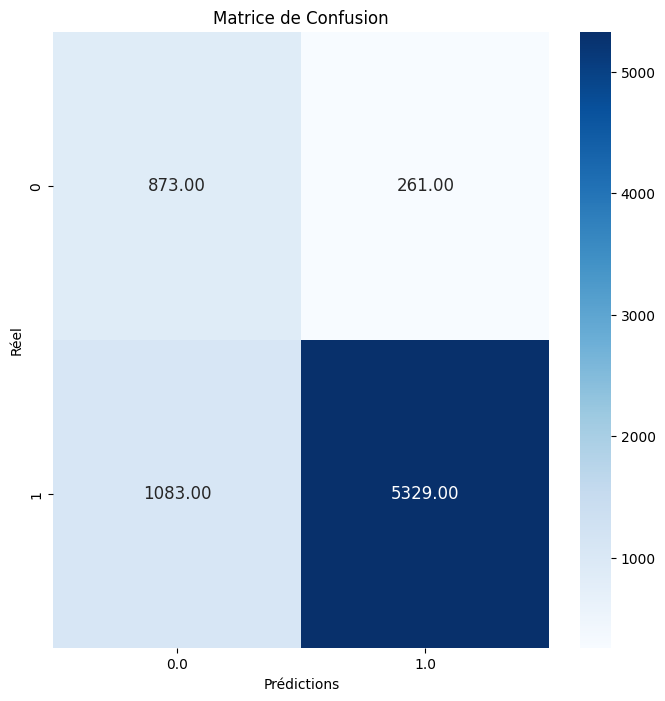

In [54]:
modeling(MultinomialNB())

<a id='xbg'></a>
### XGBoost

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1134
           1       0.95      0.91      0.93      6412

    accuracy                           0.89      7546
   macro avg       0.78      0.83      0.80      7546
weighted avg       0.90      0.89      0.89      7546

AUC  0.8264172885715826


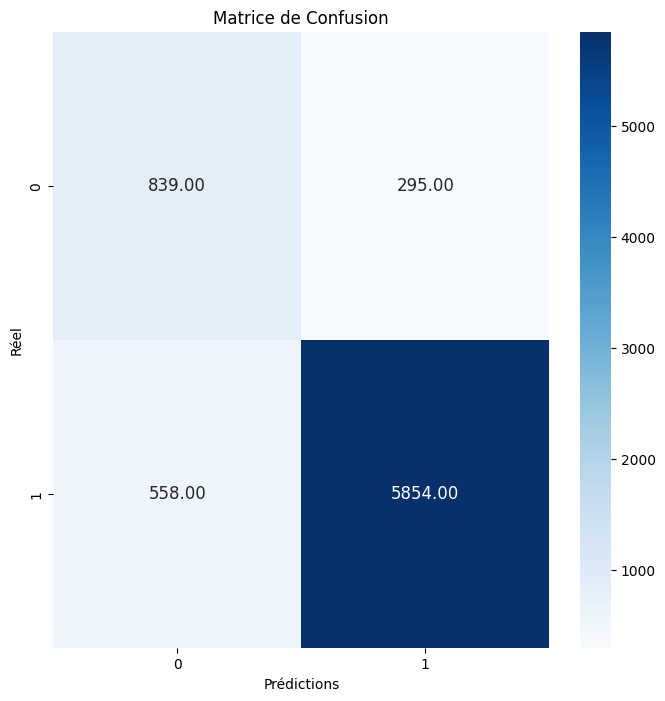

In [55]:
modeling(XGBClassifier())

### Analyse des Sentiments avec Transformers de Hugging Face

Nous utiliserons la bibliothèque Transformers de Hugging Face pour notre analyse.


In [80]:
sentiment_analyzer = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [81]:
# Testons le modèle sur quelques avis
sentiment_analyzer(['I love it', 'I hate it', 'I am not sure', 'I am not sure if I love it or hate it', 'I am not sure if I love it or hate it but I am sure that I like it'])

[{'label': 'POSITIVE', 'score': 0.9998799562454224},
 {'label': 'NEGATIVE', 'score': 0.9996398687362671},
 {'label': 'NEGATIVE', 'score': 0.9996387958526611},
 {'label': 'NEGATIVE', 'score': 0.9992321729660034},
 {'label': 'POSITIVE', 'score': 0.9996434450149536}]

In [82]:
def transformer_check(n=1000):
    res_list = []
    for _ in range(n):
        res_dict = {}
        i = random.choice(range(len(data)))
        text_ = data['text'].iloc[i]
        sen_act = data['sentiment'].iloc[i]
        sen_pred = sentiment_analyzer(text_)[0]['label']
        res_dict['review'] = text_
        res_dict['sen_act'] = sen_act
        res_dict['sen_pred'] = sen_pred
        res_dict['match'] = sen_act == sen_pred
        
        res_list.append(res_dict)
        
    return pd.DataFrame(res_list)

In [84]:
results = transformer_check()

In [85]:
results.sample(10)

,review,sen_act,sen_pred,match
41,i didn t expect them be as good a duracell or ...,NEGATIVE,NEGATIVE,True
872,perfect gift for tech family introduction nume...,POSITIVE,POSITIVE,True
474,great stream device base on android which make...,POSITIVE,POSITIVE,True
26,one star because should ve be include when i p...,NEGATIVE,NEGATIVE,True
134,i have several amazon basic product always tel...,NEGATIVE,NEGATIVE,True
31,entry level ereader only allow you read in day...,POSITIVE,NEGATIVE,False
897,my son love tablet i love all child security i...,POSITIVE,POSITIVE,True
413,great case ok tablet no android play store wea...,NEGATIVE,NEGATIVE,True
952,i buy tablet for my child because he previousl...,NEGATIVE,NEGATIVE,True
199,what difference get super deal before christma...,POSITIVE,POSITIVE,True


In [86]:
print(results['match'].mean())

0.749


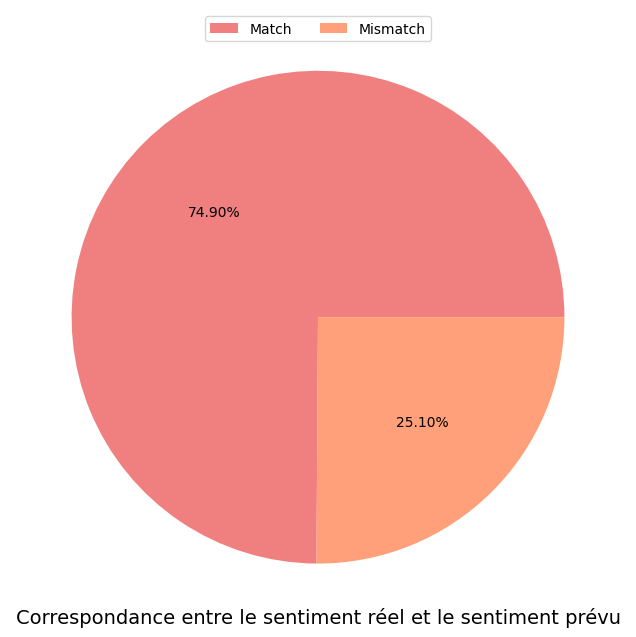

In [87]:
# graphique de visaualisation des résultats
plt.figure(figsize=(8, 8))
plt.pie(results['match'].value_counts(), autopct='%0.2f%%', colors = ['#F08080', '#FFA07A'])
plt.title('Correspondance entre le sentiment réel et le sentiment prévu', size=14, y=-0.01)
plt.legend(['Match', 'Mismatch'], ncol=2, loc=9)
plt.show()
